**Title: Chronic Kidney Disease Prediction**

**Category: Medical Science**

**Objective:** CKD is a significant global health issue that requires early intervention, patient education, and multidisciplinary care to improve outcomes and quality of life.

**Summary:** Chronic Kidney Disease (CKD) is a progressive condition characterized by the gradual loss of kidney function over time. It is often caused by underlying conditions such as diabetes, hypertension, or glomerulonephritis. CKD can lead to severe complications, including cardiovascular disease, anemia, bone disorders, and, eventually, kidney failure requiring dialysis or transplantation.Advanced tools, including statistical models and machine learning algorithms, are often employed to improve accuracy.We are use KNN, Decision tree and Ada boost and Cat Boost classifier to develop this model. The goal of kidney disease prediction is to enable early detection and preventive measures. This may include lifestyle modifications, medical interventions, or more frequent monitoring for at-risk individuals. Accurate prediction models can significantly reduce the burden of kidney disease by preventing them or minimizing their impact through timely treatment.

**Data Source:** https://www.kaggle.com/code/niteshyadav3103/chronic-kidney-disease-prediction-98-accuracy/input?select=kidney_disease.csv

# This code represents how to load and export dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('kidney_disease.csv')

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,15.4,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,11.3,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,NaN,9.6,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,111.0,2.5,11.2,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,11.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,148,69.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
2095,149,65.0,70.0,1.020,1.0,0.0,abnormal,abnormal,notpresent,notpresent,...,NaN,NaN,10.5,yes,no,no,good,yes,no,ckd
2096,150,8.0,60.0,1.025,3.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,12.3,no,no,no,poor,yes,no,ckd
2097,151,76.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,141.0,5.5,9.6,yes,yes,no,good,no,yes,ckd


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,15.4,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,11.3,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,NaN,9.6,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,111.0,2.5,11.2,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,11.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,2099.000000,2037.000000,2025.000000,1799.00000,1805.000000,1782.000000,1826.000000,1997.000000,2009.000000,1554.000000,1548.000000,1770.000000
mean,166.482611,52.738341,77.753086,1.01597,1.289197,0.572391,160.938116,62.889084,3.621005,136.345560,4.748256,11.752881
std,103.054384,17.430152,14.681677,0.00556,1.403006,1.209211,93.508690,53.618312,6.240276,10.798391,3.812059,2.792394
min,0.000000,2.000000,50.000000,1.00500,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,85.000000,45.000000,70.000000,1.01000,0.000000,0.000000,102.000000,28.000000,1.100000,134.000000,3.800000,9.800000
50%,151.000000,56.000000,80.000000,1.01500,1.000000,0.000000,127.500000,46.000000,1.700000,137.000000,4.400000,11.500000
75%,232.000000,65.000000,90.000000,1.02000,2.000000,0.000000,207.000000,79.000000,3.400000,141.000000,4.900000,13.900000
max,399.000000,90.000000,180.000000,1.02500,5.000000,5.000000,956.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [ ]:
df.isnull().sum()

,0
id,0
age,62
bp,74
sg,300
al,294
su,317
rbc,981
pc,405
pcc,12
ba,12


In [ ]:
df.isnull().sum().sum()

4374

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

In [ ]:
filled=df.fillna({
    'age':df['age'].median(),
    'bp':df['bp'].median(),
    'sg':df['sg'].median(),
    'al':df['al'].median(),
    'su':df['su'].median(),
    'rbc':'normal',
    'pc':'normal',
    'pcc':'notpresent',
    'ba':'notpresent',
    'bgr':df['bgr'].median(),
    'bu':df['bu'].median(),
    'sc':df['sc'].median(),
    'sod':df['sod'].median(),
    'pot':df['pot'].min(),
    'hemo':df['hemo'].min(),
    'htn':'no',
    'dm':'no',
    'cad':'no',
    'appet':'good',
    'pe':'no',
    'ane':'no'
})

In [ ]:
print(filled.isnull().sum())

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


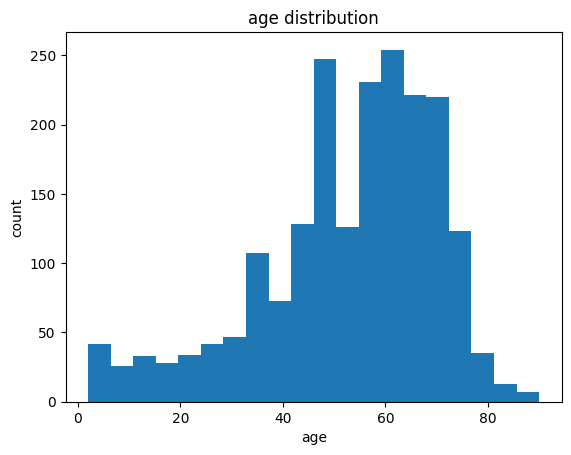

In [ ]:
df['age'].plot(kind='hist',bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.title('age distribution')
plt.show()

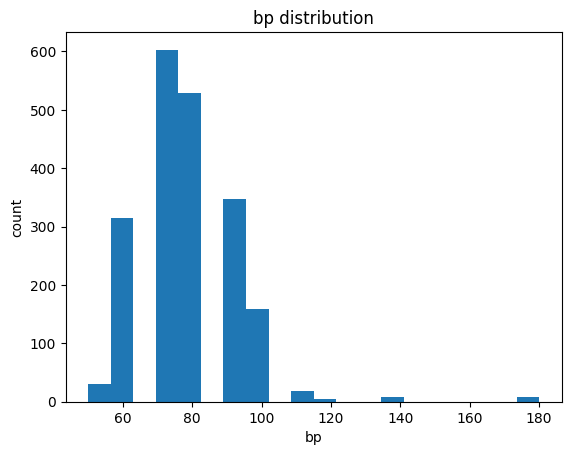

In [ ]:
df['bp'].plot(kind='hist',bins=20)
plt.xlabel('bp')
plt.ylabel('count')
plt.title('bp distribution')
plt.show()

In [ ]:
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

<ipython-input-11-16fe6eaa8e52>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-11-16fe6eaa8e52>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-11-16fe6eaa8e52>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

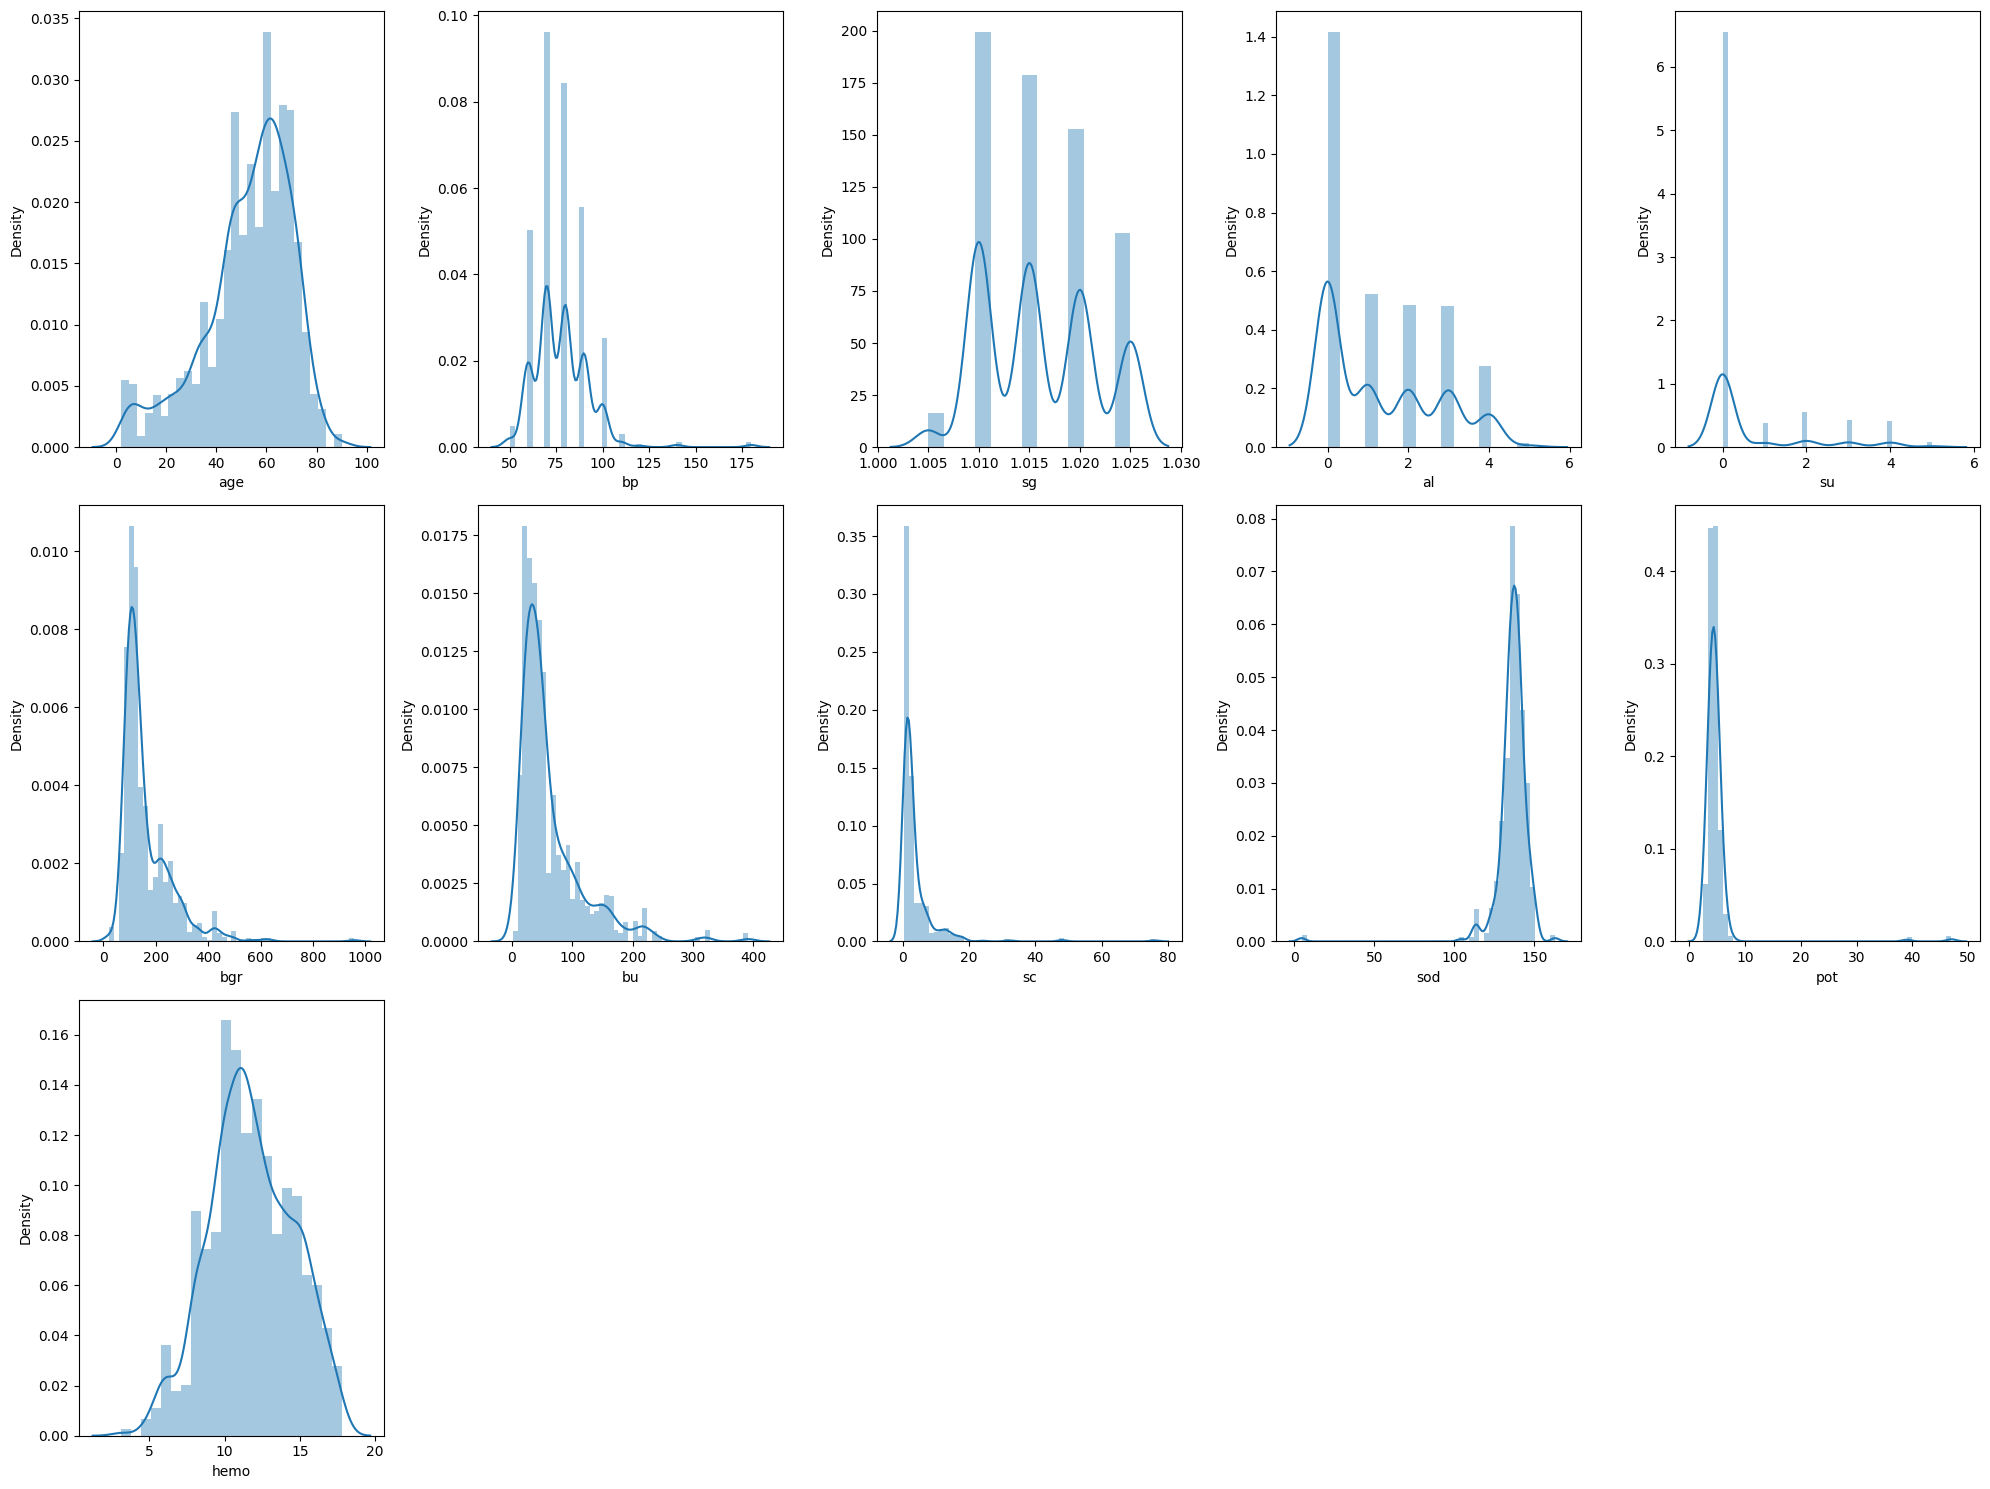

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

<ipython-input-12-08c1a8e986dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'rocket')
<ipython-input-12-08c1a8e986dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'rocket')
<ipython-input-12-08c1a8e986dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette = 'rocket')
<ipython-input-12-08c1a8e986dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for th

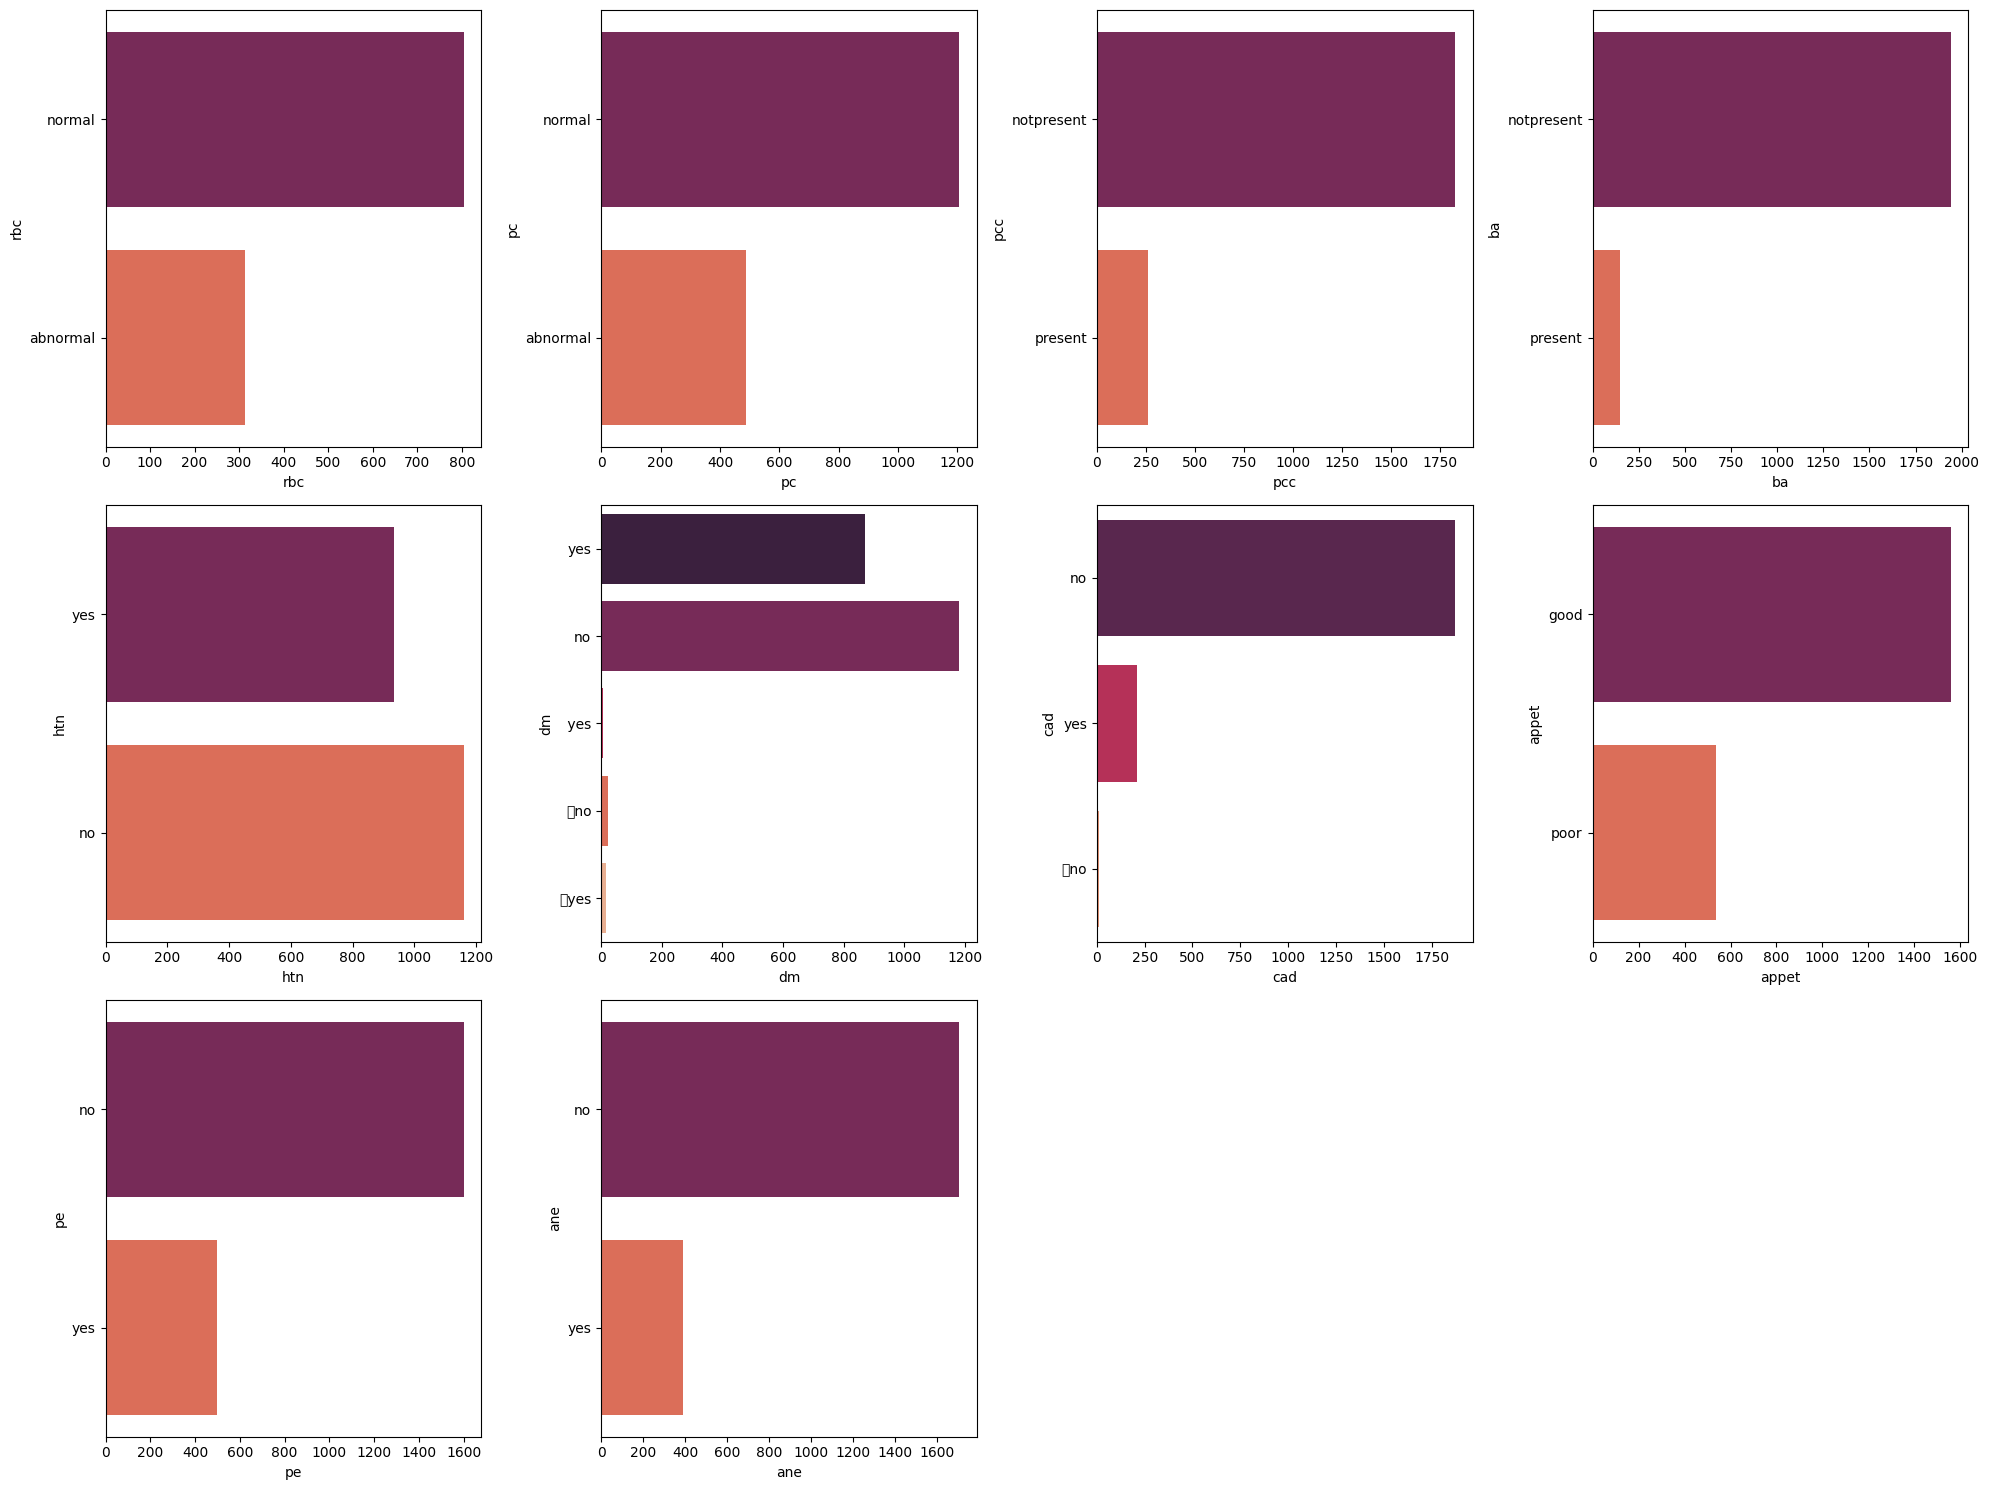

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
def violin(col):
    fig = px.violin(df, y=col, color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('pc')

In [ ]:
violin('pcc')

In [ ]:
violin('ba')

In [ ]:
violin('htn')

Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 5 categories

cad has 3 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Model Building

In [ ]:
ind_col = [col for col in df.columns if col != 'classification'] # Changed 'class' to 'classification'
dep_col = 'classification' # Changed 'class' to 'classification'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

KNN

In [ ]:
ind_col = [col for col in filled.columns if col != 'classification']
dep_col = 'classification'

X = filled[ind_col]
y = filled[dep_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

le = LabelEncoder()

for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])  # Use transform for X_test

# Now, fit the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# ... (rest of your code)

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9993192648059904
Test Accuracy of KNN is 0.9920634920634921 

Confusion Matrix :- 
[[491   0   0]
 [  5   0   0]
 [  0   0 134]]

Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.99      1.00      0.99       491
        ckd	       0.00      0.00      0.00         5
      notckd       1.00      1.00      1.00       134

    accuracy                           0.99       630
   macro avg       0.66      0.67      0.66       630
weighted avg       0.98      0.99      0.99       630



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[491   0   0]
 [  0   5   0]
 [  0   0 134]]

Classification Report :- 
               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       491
        ckd	       1.00      1.00      1.00         5
      notckd       1.00      1.00      1.00       134

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator=dtc)
ada.fit(X_train, y_train)

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 1.0 

Confusion Matrix :- 
[[491   0   0]
 [  0   5   0]
 [  0   0 134]]

Classification Report :- 
               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       491
        ckd	       1.00      1.00      1.00         5
      notckd       1.00      1.00      1.00       134

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



Cat Boost Classifier

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4269670	total: 52.5ms	remaining: 472ms
1:	learn: 0.2399787	total: 57.3ms	remaining: 229ms
2:	learn: 0.1425108	total: 61.9ms	remaining: 144ms
3:	learn: 0.0941132	total: 66.4ms	remaining: 99.6ms
4:	learn: 0.0638015	total: 71.1ms	remaining: 71.1ms
5:	learn: 0.0455235	total: 75.6ms	remaining: 50.4ms
6:	learn: 0.0344195	total: 80.1ms	remaining: 34.3ms
7:	learn: 0.0259013	total: 84.7ms	remaining: 21.2ms
8:	learn: 0.0200138	total: 89ms	remaining: 9.89ms
9:	learn: 0.0164248	total: 93.5ms	remaining: 0us


In [ ]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9993192648059904
Test Accuracy of Cat Boost Classifier is 0.9920634920634921 

Confusion Matrix :- 
[[491   0   0]
 [  5   0   0]
 [  0   0 134]]

Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.99      1.00      0.99       491
        ckd	       0.00      0.00      0.00         5
      notckd       1.00      1.00      1.00       134

    accuracy                           0.99       630
   macro avg       0.66      0.67      0.66       630
weighted avg       0.98      0.99      0.99       630



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Ada Boost Classifier', 'Cat Boost'],
    'Score' : [knn_acc, dtc_acc, ada_acc, cat_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,1.000000
2,Ada Boost Classifier,1.000000
0,KNN,0.992063
3,Cat Boost,0.992063


from matplotlib import pyplot as plt
_df_8['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')
